<a href="https://colab.research.google.com/github/SopiBell/ProyectoParte2_Bellinghausen/blob/main/Forest_health_and_ecological_diversity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Salud de los bosques y diversidad ecológica

El conjunto de datos es una recopilación integral de mediciones ecológicas y ambientales centradas en las características de los árboles y las condiciones del sitio. Cada registro en el conjunto representa un árbol o parcela distinta, con las siguientes características:

Plot_ID: Identificador único para cada parcela donde se toman las mediciones.

Esto ayuda a distinguir entre diferentes ubicaciones dentro del área de estudio.

Latitude: Latitud geográfica de la parcela, medida en grados. Indica la posición norte-sur de la parcela en la superficie terrestre.

Longitude: Longitud geográfica de la parcela, medida en grados. Indica la posición este-oeste de la parcela.

DBH (Diámetro a la Altura del Pecho): Diámetro del árbol medido a 1.3 metros sobre el nivel del suelo, típicamente expresado en centímetros. Este parámetro es crucial para evaluar el tamaño y la salud del árbol.

Tree_Height: Altura total del árbol desde la base hasta la copa, medida en metros. Esta medición ayuda a entender los patrones de crecimiento y el rol ecológico del árbol.

Crown_Width_North_South: Ancho de la copa del árbol medido en dirección norte-sur, típicamente en metros. Esta dimensión puede indicar el estado de salud general y la competitividad del árbol en el ecosistema.

Crown_Width_East_West: Ancho de la copa del árbol medido en dirección este-oeste, también en metros. Junto con el ancho norte-sur, proporciona una visión completa del tamaño del dosel del árbol.

Slope: Inclinación del terreno donde se encuentra el árbol, medida en grados. Puede influir en el drenaje de agua, erosión del suelo y desarrollo de raíces.

Elevation: Altura de la parcela sobre el nivel del mar, medida en metros. La altitud puede afectar la temperatura, la precipitación y la dinámica del ecosistema.

Temperature: Temperatura promedio registrada en la parcela, medida en grados Celsius. Este factor puede influir en el crecimiento, la salud y la distribución de especies de los árboles.

Humidity: Humedad promedio en la parcela, expresada en porcentaje. Los niveles de humedad pueden afectar las tasas de transpiración y la salud general del árbol.

Nitrógeno_Total_Suelo (Soil_TN): Concentración de nitrógeno total en el suelo, medida en gramos por kilogramo (g/kg). El nitrógeno es esencial para el crecimiento y desarrollo de las plantas.

Fósforo_Total_Suelo (Soil_TP): Concentración de fósforo total en el suelo, también medida en gramos por kilogramo (g/kg). El fósforo es crucial para la transferencia de energía y la fotosíntesis.

Fósforo_Disponible_Suelo (Soil_AP): Cantidad de fósforo disponible para las plantas en el suelo, medida en gramos por kilogramo (g/kg). Esta métrica ayuda a evaluar la disponibilidad de nutrientes.

Nitrógeno_Disponible_Suelo (Soil_AN): Cantidad de nitrógeno disponible para la absorción de las plantas en el suelo, medida en gramos por kilogramo (g/kg). Refleja la fertilidad del suelo.

Menhinick_Index: Índice de diversidad que refleja la riqueza de especies en el área. Valores más altos indican mayor biodiversidad.

Gleason_Index: Otro índice de diversidad que toma en cuenta la abundancia y riqueza de especies dentro de la comunidad.

Disturbance_Level: Variable categórica que indica el nivel de perturbación ecológica en el área (0: bajo, 1: medio, 2: alto). Esto puede afectar la salud y estabilidad del ecosistema.

Fire_Risk_Index: Medida de la probabilidad de ocurrencia de incendios basada en condiciones ambientales, con valores entre 0 y 1. Este índice puede informar estrategias de manejo en zonas propensas a incendios.

Health_Status: Variable categórica que indica la salud del árbol, clasificada como 'Saludable' o 'No Saludable'. Es importante para comprender el impacto de los factores ambientales en la vitalidad del árbol.

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [32]:
file_path = "/content/drive/My Drive/CoderHouse/Data_Science1_V2/Forest_Health_and_Ecological_Diversity/forest_health_data.csv"

df = pd.read_csv(file_path)

print(df.columns)


df.head()

Index(['Plot_ID', 'Latitude', 'Longitude', 'DBH', 'Tree_Height',
       'Crown_Width_North_South', 'Crown_Width_East_West', 'Slope',
       'Elevation', 'Soil_TN', 'Soil_TP', 'Soil_AP', 'Soil_AN',
       'Menhinick_Index', 'Gleason_Index', 'Disturbance_Level',
       'Fire_Risk_Index', 'Health_Status'],
      dtype='object')


,Plot_ID,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index,Health_Status
0,1,24.981605,-117.040695,29.862040,20.835684,6.147963,4.542720,29.171563,212.518419,0.723065,0.457221,0.189952,0.268850,2.135766,4.897271,0.073175,0.499670,Healthy
1,2,48.028572,-92.066934,28.462986,24.307079,8.248891,5.260921,7.757386,641.640332,0.690410,0.265053,0.169791,0.073260,0.700081,1.068692,0.089478,0.746747,Unhealthy
2,3,39.279758,-68.893791,91.094185,9.013101,7.841448,8.690927,39.257755,2510.612835,0.104797,0.363831,0.092196,0.297665,1.105825,4.790607,0.651974,0.562667,Unhealthy
3,4,33.946339,-78.744258,28.706889,19.496475,2.385099,4.060039,27.590231,2323.628233,0.923347,0.220844,0.305597,0.160819,2.434198,2.474710,0.486941,0.083303,Sub-Healthy
4,5,16.240746,-73.540720,30.835224,18.008888,2.343245,8.826847,7.074175,1116.863805,0.572787,0.316867,0.240929,0.030913,1.821715,1.040362,0.790415,0.185580,Unhealthy


## ¿Hay datos nulos en el dataset?

In [8]:
df.isnull()
df.isnull().sum()

,0
Plot_ID,0
Latitude,0
Longitude,0
DBH,0
Tree_Height,0
Crown_Width_North_South,0
Crown_Width_East_West,0
Slope,0
Elevation,0
Soil_TN,0


# Número de entradas en el Dataset

In [9]:
num_filas, num_columnas = df.shape

print(f"El dataset tiene {num_filas} filas y {num_columnas} columnas.")

El dataset tiene 1000 filas y 18 columnas.


# Relación entre entradas Norte y Sur y derecha e izquierda de Greenwich

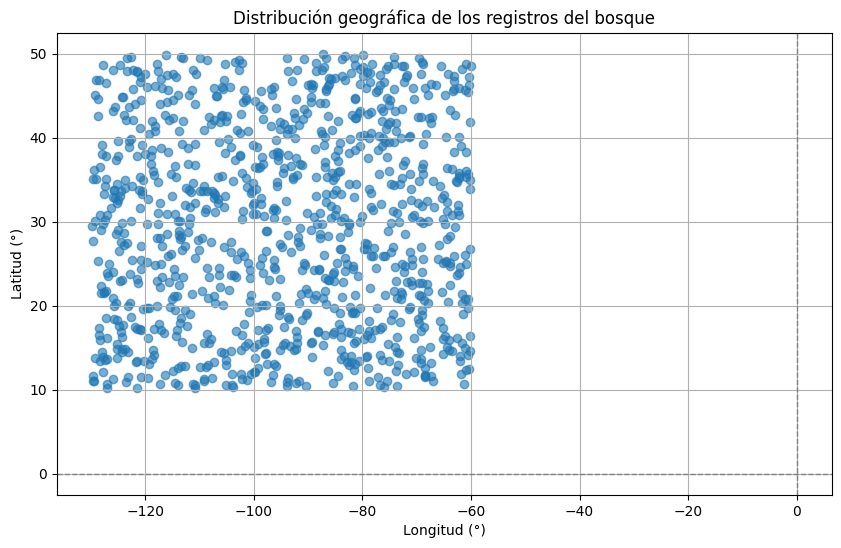

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.6)

plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Ecuador
plt.axvline(0, color='gray', linestyle='--', linewidth=1)  # Greenwich

plt.title('Distribución geográfica de los registros del bosque')
plt.xlabel('Longitud (°)')
plt.ylabel('Latitud (°)')
plt.grid(True)
plt.show()

# Ubicación geografica de registros

In [33]:
max_lat = df['Latitude'].max()
min_lat = df['Latitude'].min()
max_lon = df['Longitude'].max()
min_lon = df['Longitude'].min()

print("Valores extremos de ubicación geográfica:")
print(f"Latitud máxima: {max_lat}")
print(f"Latitud mínima: {min_lat}")
print(f"Longitud máxima: {max_lon}")
print(f"Longitud mínima: {min_lon}")

Valores extremos de ubicación geográfica:
Latitud máxima: 49.98870693144522
Latitud mínima: 10.185280920184114
Longitud máxima: -60.04103919605335
Longitud mínima: -129.7747215477005


In [34]:
import folium

# Coordenadas de los extremos
lat_min = 10.185280920184114
lat_max = 49.98870693144522
lon_min = -129.7747215477005
lon_max = -60.04103919605335

center_lat = (lat_min + lat_max) / 2
center_lon = (lon_min + lon_max) / 2

m = folium.Map(location=[center_lat, center_lon], zoom_start=4)

# Agregar un rectángulo que marque la superficie cubierta
folium.Rectangle(
    bounds=[[lat_min, lon_min], [lat_max, lon_max]],
    color='blue',
    fill=True,
    fill_opacity=0.2,
    tooltip='Área cubierta por el dataset'
).add_to(m)

# Mostrar el mapa (en Jupyter o Google Colab)
m


A partir de los datos máximos y mínimos recabados podemos conocer la parte del mundo donde se está considerando este estudio. El cual se limita al continente americano desde poco más arriba de Panama hasta la parte inferior de Canada.

# Hipótesos

Hipotesis
1.   La pendiente, el fosforo y nitrógeno accesibles están relacionados con el estatus de salud del bosque.
2.   El estatus de salud del bosque y el nivel de perturbación están relacionados de manera equitativa.
3.   La humedad, la temperatura y el riesgo de fuego están relacionados.



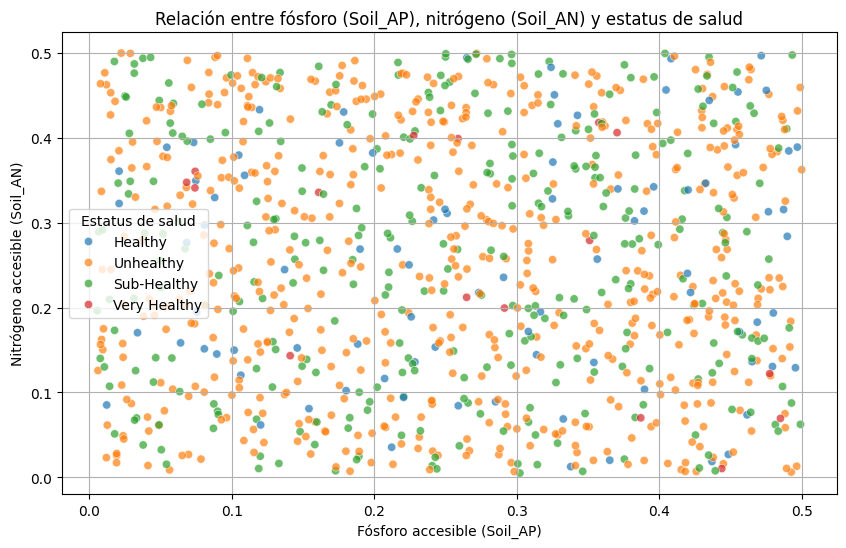

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Soil_AP', y='Soil_AN', hue='Health_Status', alpha=0.7)

# Etiquetas y título
plt.title('Relación entre fósforo (Soil_AP), nitrógeno (Soil_AN) y estatus de salud')
plt.xlabel('Fósforo accesible (Soil_AP)')
plt.ylabel('Nitrógeno accesible (Soil_AN)')
plt.legend(title='Estatus de salud')
plt.grid(True)
plt.show()

In [35]:
from sklearn.preprocessing import LabelEncoder

# Convertir Health_Status a valores numéricos
if df['Health_Status'].dtype == 'object':
    le = LabelEncoder()
    df['Health_Status_numeric'] = le.fit_transform(df['Health_Status'])
else:
    df['Health_Status_numeric'] = df['Health_Status']

# Correlación
correlation_matrix = df[['Soil_AP', 'Soil_AN', 'Health_Status_numeric']].corr()

print("Matriz de correlación:")
print(correlation_matrix)

Matriz de correlación:
                        Soil_AP   Soil_AN  Health_Status_numeric
Soil_AP                1.000000 -0.015680              -0.035411
Soil_AN               -0.015680  1.000000              -0.013558
Health_Status_numeric -0.035411 -0.013558               1.000000


Gracias a los resultados presentados, podemos saber que que el fosforo y nitrogeno accesibles en el suelo no están directamente relacionados con el estatus da salud. Sin embargo hay que considerar que los factores que determinan la salud de un bosque son muchos más que el fósforo y nitrogeno accesibles en el suelo. Por tal motivo podríamos decir que la respuesta es inconclusa.

Hipotesis 2: El estatus de salud del bosque y el nivel de perturbación están relacionados de manera equitativa.

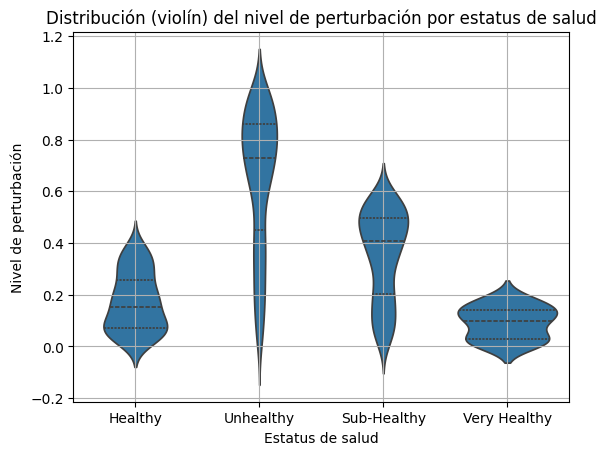

In [21]:
sns.violinplot(data=df, x='Health_Status', y='Disturbance_Level', inner='quartile')
plt.title('Distribución (violín) del nivel de perturbación por estatus de salud')
plt.xlabel('Estatus de salud')
plt.ylabel('Nivel de perturbación')
plt.grid(True)
plt.show()

# Consignas trabajo final

In [26]:
label_encoder = LabelEncoder()
df['Health_Status_encoded'] = label_encoder.fit_transform(df['Health_Status'])

columns_to_drop = ['Plot_ID', 'Latitude', 'Longitude', 'Health_Status']
df_clean = df.drop(columns=columns_to_drop)

X = df_clean.drop(columns='Health_Status_encoded')
y = df_clean['Health_Status_encoded']

selector = SelectKBest(score_func=f_classif, k=8)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()

print("Variables seleccionadas:", selected_features)

Variables seleccionadas: ['DBH', 'Tree_Height', 'Elevation', 'Soil_TN', 'Soil_AP', 'Menhinick_Index', 'Disturbance_Level', 'Fire_Risk_Index']


# Entrenar modelo

In [27]:
X_model = df[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X_model, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.96

Matriz de confusión:
 [[ 23   5   0   0]
 [  0  86   0   0]
 [  0   1 179   0]
 [  1   5   0   0]]

Reporte de clasificación:
               precision    recall  f1-score   support

     Healthy       0.96      0.82      0.88        28
 Sub-Healthy       0.89      1.00      0.94        86
   Unhealthy       1.00      0.99      1.00       180
Very Healthy       0.00      0.00      0.00         6

    accuracy                           0.96       300
   macro avg       0.71      0.70      0.71       300
weighted avg       0.94      0.96      0.95       300



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


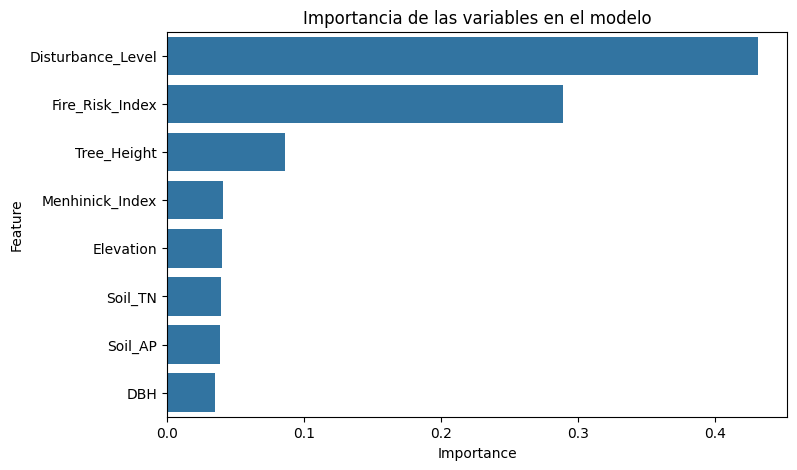

In [29]:
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Importancia de las variables en el modelo')
plt.show()

Consigna 2: Elegir un algoritmo de clasificación y entrenar el modelo

In [30]:
X_model = df[selected_features]
y_model = df['Health_Status_encoded']

X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

Consigna 3: Calcular métricas básicas para validar el modelo

Accuracy del modelo: 0.96


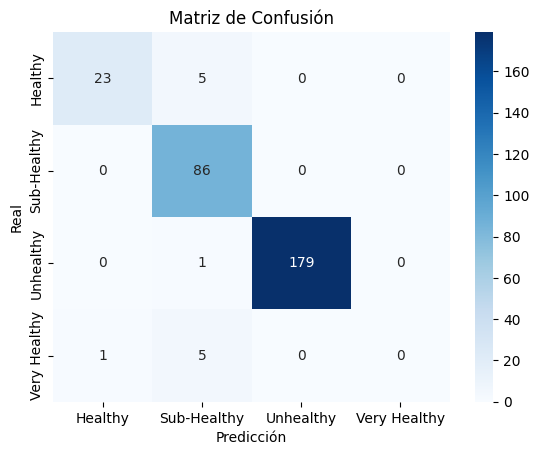

Reporte de Clasificación:

              precision    recall  f1-score   support

     Healthy       0.96      0.82      0.88        28
 Sub-Healthy       0.89      1.00      0.94        86
   Unhealthy       1.00      0.99      1.00       180
Very Healthy       0.00      0.00      0.00         6

    accuracy                           0.96       300
   macro avg       0.71      0.70      0.71       300
weighted avg       0.94      0.96      0.95       300



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [36]:
print("Accuracy del modelo:", round(accuracy_score(y_test, y_pred), 4))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# Reporte de clasificación
print("Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Consigna 4: Conclusiones